Name : Alviya Ali 
PRN : 24070243005

File 2 : Mask Detector 

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


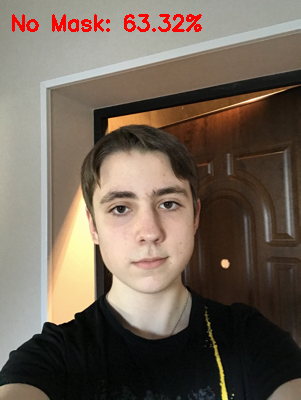

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


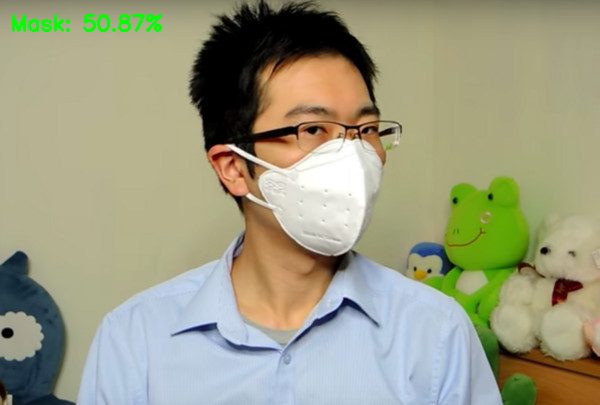

In [10]:
maskNet = load_model("/content/mask_detector.keras")

def predict_mask(image_path):
    # Load and preprocess the image
    frame = cv2.imread(image_path)
    if frame is None:
        print("[ERROR] Could not read image")
        return

    face = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    face = cv2.resize(face, (224, 224))
    face = img_to_array(face)
    face = preprocess_input(face)
    face = np.expand_dims(face, axis=0)

    # Make prediction
    (mask, withoutMask) = maskNet.predict(face)[0]

    label = "Mask" if mask > withoutMask else "No Mask"
    color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
    label = f"{label}: {max(mask, withoutMask) * 100:.2f}%"

    cv2.putText(frame, label, (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
    cv2_imshow(frame)


predict_mask("/content/maksssksksss128.png")
predict_mask("/content/maksssksksss6.png")